tried to make something like : https://en.wikipedia.org/wiki/Pi#/media/File:Comparison_pi_infinite_series.svg

In [6]:
import matplotlib.pyplot as plt
from math import pi
from math import factorial

In [7]:
tau = 2*pi
n = 20

$$Vie'te : \quad \tau = \frac{4}{\frac{\sqrt{2}}{2}\cdot \frac{ \sqrt{2+\sqrt{2}}}{2}\cdot \frac{ \sqrt{2+\sqrt{2+\sqrt{2}}}}{2} ...} = \frac{4}{\lim_{x \to \infty} \prod_{i=1}^{n} \frac{a_{i}}{2}}$$ <br>

$$Wallis : \quad \tau = 4\left (\frac{2}{1} \cdot \frac{2}{3} \right) \cdot \left (\frac{4}{3} \cdot \frac{4}{5} \right) \cdot \left (\frac{6}{5} \cdot \frac{6}{7} \right) ... = 4\prod_{n=1}^{\infty}\left ( \frac{2n}{2n-1} \cdot \frac{2n}{2n+1} \right )$$ <br>

$$Madhava-Gregory-Leibniz : \quad \tau = 8\left ( 1 - \frac{1}{3} + \frac{1}{5} -...\right) = 8\sum_{k=0}^{\infty}\frac{(-1)^{k}}{2k+1}$$ <br>

$$Madhava : \quad \tau = \sqrt{48}\left ( 1 - \frac{1}{3 \cdot 3} + \frac{1}{5 \cdot 3^{2}} - \frac{1}{7 \cdot 3^{3}} + ... \right) = \sqrt{48}\sum_{k=0}^{\infty} \frac{(-1)^{k}}{(2k+1) \cdot 3^{k}}$$ <br>

$$Newton : \quad \tau = 12\sum_{n=0}^{\infty} \frac{(2n)!}{2^{4n+1} \cdot (n!)^{2} \cdot (2n+1)}$$ <br>

$$Nilakantha : \quad \tau = 6 + \frac{8}{2 \times 3 \times 4} - \frac{8}{4 \times 5 \times 6} + \frac{8}{6 \times 7 \times 8} - ... = 6 + 8\sum_{n=1}^{\infty} \frac{(-1)^{n+1}}{(2n) \cdot (2n+1) \cdot (2n+2)}$$

In [44]:
# define functions to compute the approximation till certain steps

def viete(n):
  values = []
  val = 1.0
  a = 2**0.5
  for k in range(n):
    val *= a/2
    a = (2+a)**0.5
    values.append(4/val)
  return values

def wallis(n):
  values = []
  val = 1.0
  for k in range(1,n+1):
    val *= ((2*k)/(2*k-1))*((2*k)/(2*k+1))
    values.append(4*val)
  return values

def leibniz(n):
  values = []
  val = 0.0
  for k in range(n):
    val += ((-1)**k)/(2*k+1)
    values.append(8*val)
  return values    

def madhava(n):
  values = []
  val = 0.0
  for k in range(0,n):
    val += ((-1)**(k))/((2*k+1)*(3**k))
    values.append((48**0.5)*val)
  return values

def newton(n):
  values = []
  val = 0.0
  for k in range(0,n):
    val += factorial(2*k)/((2**(4*k+1))*(factorial(k)**2)*(2*k+1))
    values.append(12*val)
  return values

def nilakantha(n):
  values = []
  val = 6.0
  values.append(val)
  for k in range(1,n):
    val += ((-1)**(k+1))*(8/((2*k)*(2*k+1)*(2*k+2)))
    values.append(val)
  return values  

In [45]:
# function to plot the values

def plot_converg(ax,xlim=False):
  n_values = [i for i in range(1,n+1)]

  ax.plot(viete_values,n_values,marker='x')
  ax.plot(wallis_values,n_values,marker="*")
  ax.plot(leib_values,n_values,marker='s')
  ax.plot(madhava_values,n_values,marker='^')
  ax.plot(newton_values,n_values,marker='v')
  ax.plot(nilakantha_values,n_values,marker='o')

  ax.plot([tau]*n,n_values,linestyle='--')
  ax.legend(["Viete","Wallis","Leibniz","Madhava","Newton","Nilakantha"])  
  ax.invert_yaxis()
  ax.set_xlabel('Sn')
  ax.set_ylabel("n")
  ax.set_yticks(range(2,n+1,2))
  if xlim:
    ax.set_xlim(xlim)
  return ax

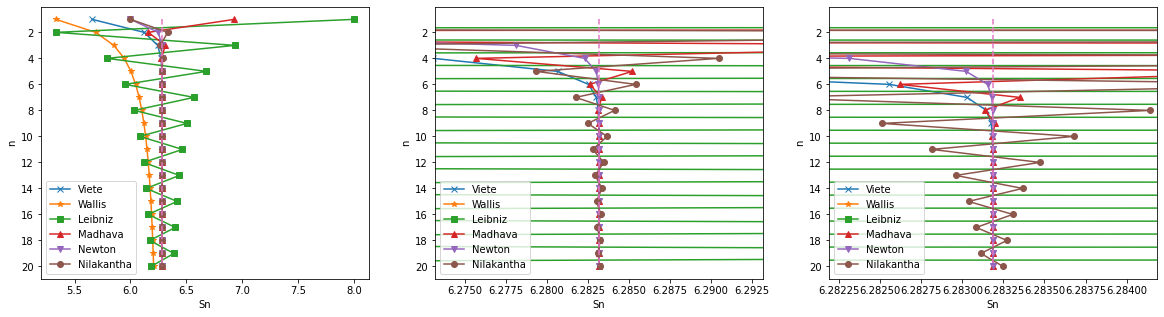

In [46]:
# compute the values and create 3 subplots

viete_values = viete(n)
wallis_values = wallis(n)
leib_values = leibniz(n)
madhava_values = madhava(n)
newton_values = newton(n)
nilakantha_values = nilakantha(n)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))
plot_converg(ax1)
plot_converg(ax2,xlim=[tau-0.01,tau+0.01])
plot_converg(ax3,xlim=[tau-0.001,tau+0.001])